# Search via Szegedy Quantum Walks

## Prelude

This notebook is split into three sections.
1. [Markov Chains](#markov-chains)
2. [Szegedy Quantum Walk](#szegedy-quantum-walk)
3. [Search via Szegedy](#search-via-szegedy)
The first section gives an introduction to the theory of Markov chains which will be useful for understanding the Szegedy Quantum Walk formalism. 

## Markov Chains
This section is almost entirely based on this excellent [tutorial](https://mpaldridge.github.io/math2750/S00-about.html) I found by Dr Matthew Aldrige.

A stochastic process is an ordered sequence of random variables, $X_n$, that may be dependent on each other. Each $X_n$ is sampled from a state space $S$ which may be discrete, continuous, finite or infinite, and the sequence $(X_n)$ is ordered by the index $n$ which usually denotes some time variable and which can also be either discrete or continuous.

A Markov chain is a descriptive tool for working with stochastic processes that have discrete space and time and satisfy the so-called Markov (or memoryless) property. The Markov property is where the state of the process one step in the future $X_{n+1}$ only cares about the current state $X_n$ and not how we got there. Formally $(X_n)$ satisfies a conditional independence of the form $P(X_{n+1} | X_{n}= x_n, X_{n-1} = x_{n-1}...X_0 = x_0) = P(X_{n+1}|X_n = x_n)$.

A Markov chain is completely described by a starting state and a set of transition probabilities. The starting state is our initial distribution over the the state space, $\lambda$ where for some $i\in S$, $\lambda_i = P(X_0 = i)$. This clearly enforces $0 \le \lambda_i \le 1$ and $||\lambda|| = 1$. The transition probabilities are a set of probabilities $P(X_{n+1} = j| X_n = i)$ for all $n \in \mathbb{N}$ and all $(i,j) \in S$. Given both of these as input, we can simulate our Markov chain by first sampling from our initial distribution $\lambda$ to get $X_0$ and then sampling from our transition probabilities to generate all subsequent states $X_n$. 

Where our transition probabilities do not vary with $n$, we call the Markov chain time homogenous in which case it is convenient to write transition probabilities as a matrix $P \in \mathbb{R}^{|S| \times |S|}$ where $P_{ij} = P(X_{n+1} = j | X_n = i)$ (thus each row sums to one). The use of transition matrices greatly simplifies reasoning. For example, products of the transition matrix $P^n$ give the $n$ step transition probabilities, that is $P^n_{i,j} = P(X_n = j | X_0 = i)$. Moreover if we then left multiply this matrix with a row vector specifying our initial distribution $\lambda$, then its not too hard to see that the resultant vector correctly specifies the distribution of states after $n$ steps $\lambda'$.

$$
\lambda'_j = P(X_n = j | \lambda) = \sum_i \lambda_i P(X_{n} = j|X_0 = i) = \sum_i \lambda_i P^n_{i,j} = (\lambda P^n)_j
$$

The transition probabilities of time homogenous Markov chains can also be described by a transition diagram which is a weighted, directed graph $G = (V, E)$ where $V = S$ and $(i,j) \in E$ with edge weight $P_{ij}$ if $P_{ij} > 0$. Many of the categorisations of Markov chain given in the above ref can be viewed as resulting from properties of the transition diagram.

## Irreducible and Periodic Markov Chains 
For any two states $(i,j)$, in the state space, we say $i \leftrightarrow j$ (or $i$ communicates with $j$) if there is a path from $i$ to $j$ and vice versa in $G$. This is equivalent to the definition given in the ref, which says $i \leftrightarrow j$ if there exists $n$ and $m$ for which $P^n_{i,j} > 0$ and $P^m_{j,i}>0$. Clearly this property is transitive since if $i \leftrightarrow j $ and $j \leftrightarrow k $ then $i \leftrightarrow k$.

We can use the $\leftrightarrow$ to partition the state space of any Markov chain into communicating classes such that if $i \leftrightarrow j$ then $i$ and $j$ are in the same class. Because of the transitivity of $\leftrightarrow$ every state is in exactly one class and communicates with every state in that class (including itself). Communicating classes are closed if once entered there's no way to leave (i.e. no outgoing edges) and are otherwise open. Finally, and most importantly, a Markov chain with a single communicating class is called **irreducible** (i.e. every state is reachable from every other state).

$C_i = \{n : n > 0, P^n_{i,i} > 0\}$ defines the set of lengths of all cycles in the Markov chain starting and ending at state $i$. The period of state $i$, $d_i$ is the greatest common factor of $C_i$. If $d_i = 1$, $i$ is **aperiodic**, otherwise, $i$ is periodic. It turns out that every state in a communicating class has the same period, so, for an irreducible Markov chain, we may refer to the whole Markov chain as aperiodic or periodic.

See below an example Markov chain. Immediately, we can see that there are two communicating classes $C_1 = \{1,2,3,4\}$ and $C_2=\{5,6,7\}$ where $C_1$ is an open class with period $2$ and $C_2$ is a closed class with period $3$. The Markov chain is thus reducible.
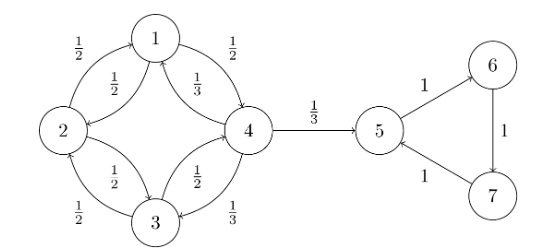\

One type of Markov chain not discussed in the ref is the symmetric Markov chain, where $P = P^T$ (i.e. an undirected Markov chain). If the Markov chain is a connected undirected graph, then it must be irreducible and positive recurrent.

## Hitting Time and Recurrent Markov Chains
The hitting time of a subset of states $A \subset S$ is a random variable $H_A$ that gives the minimum $n$ such that $X_n \in A$. From starting state $i$, the expected hitting time of $A$ can be written $\eta_{i,A} = E(H_A | X_0 = i)$. Furthermore, the hitting probability of $A$ from some state $i$ can be written $h_{i, A} = P(X_n \in A \text{ for some } n \ge 0| X_0 = i)$. Clearly $\eta_{i,A}$ can only be finite (but is not necessarily) if $h_{i,A} = 1$.

The return time is another random variable, $M_i$ that, for some $i$, gives the minimum $n>0$ such that $X_n = i$. Associated with the return time is also the expected return time, $\mu_i = E(M_i | X_0 = i)$, and the return probability $m_i = P(X_n = i \text{ for some } n \ge 1| X_0 = i)$ and just as before the former is finite only if the latter equals 1.

We define a state $i$ to be recurrent if $m_i = 1$, in which case it can be shown that we will return to $i$ infinitely many times with probability 1. A state is called transient if $m_i < 1$, in which case we can show that we will return to $i$ finitely many times with probability 1. It turns out that in a communicating class, either every state is transient or every state is recurrent and thus we may refer to the class as transient or recurrent. Furthermore, every finite closed communicating class is recurrent and every open one is transient. In the above image, its clear that the return probability of all states in $C_1$ is less than one because traversing the edge $(4,5)$ leads to the closed class $C_2$ from which there is no return. In contrast, every state in $C_2$ has return probability 1. Its clear that a finite, irreducible Markov chain is recurrent. 

Finally, if the expected return time of a recurrent state $i$ is finite, we say it is positive recurrent and otherwise, that it is null recurrent. Once again, these properties are mirrored by every state in a communicating class and this is illustrated in the above diagram. Any finite irreducible Markov chain is positive recurrent.

## Stationary and Equilibrium Distributions
A stationary distribution $\pi$ is a row vector statsifying $\pi P = \pi$. That is, the distribution $P(X_n = i)$ stays the same. An intuitive way of understanding this is, say we start up a large number $M$ many Markov chains, each with initial state $X_0 \sim \pi$. For all $n$ (including the $n=0$), we expect roughly $\pi_i M$ many of these Markov chains to be in state $i$. 

For an irreducible Markov chain, a stationary distribution **only** exists if it is positive recurrent. In this case, the stationary distribution is uniquely determined by $\pi_i = 1/\mu_i$. If the irreducible Markov chain is null recurrent or transient, then no stationary distribution exists. If the Markov chain is not irreducible then the number of stationary distributions equals the number of positive recurrent communicating classes. The stationary distribution of a symmetric Markov chain is the uniform distribution.

An equilibrium distribution, $\bar{\pi}$, is a special kind of stationary distribution which, in the limit, is always reached no matter the starting distribution. Formally, for any distribution $\lambda$, $P(X_n = j| \lambda) \rightarrow \bar{\pi}_j$ as $n \rightarrow \infin$ for all $j\in S$. It turns out that if $(X_n)$ is an irreducible and aperiodic Markov chain, then if it is also positive recurrent, the unique stationary distribution given by $\pi_i = 1/\mu_i$ also gives the equilibrium distribution.

Often in literature, it appears that any Markov chain that is irreducible, aperiodic and positive recurrent is called ergodic, however ergodicity is given a different interepretation in this tutorial which I won't get in to.

## Time Reversible Markov Chains
This section is based on this set of [lecture slides](https://www.sjsu.edu/faculty/guangliang.chen/Math263/lec5imeReversibility.pdf) by Dr Guangliang Chen from San Jose State University.

We restrict ourselves to considering an irreducible and aperiodic Markov chain $(X_n)$, for which the unique stationary distribution is given by $\pi$. Suppose the current time is a large number $n$ and the sequence of the chain thus far looks like

$$
..., X_{n-2}, X_{n-1}, X_n, ... 
$$

It turns out that if we reverse this sequence, i.e. 

$$
..., X_n, X_{n-1}, X_{n-2}, ...
$$

then we also get a Markov chain. To prove this, we need only show that the above sequence satisfies the Markov property so that the next state (previous state) only cares about the current state.

$$
P(X_{n-2} = i| X_{n-1} = j, X_n = k) = \frac{P(X_{n-1} = j, X_n = k | X_{n-2} = i)P(X_{n-2} = i)}{P(X_{n-1} = j, X_{n} = k)}\\
= \frac{P(X_n = k| X_{n-1} = j, X_{n-2} = i)P(X_{n-2} = i)P(X_{n-1} = j)}{P(X_{n} = k|X_{n-1} = j)P(X_{n-1} = j)}\\
=\frac{P(X_n = k| X_{n-1} = j)P(X_{n-1} = j| X_{n-2} = i)P(X_{n-2} = i)}{P(X_{n} = k|X_{n-1} = j)P(X_{n-1} = j)}\\
=\frac{P(X_{n-1} = j| X_{n-2} = i)P(X_{n-2} = i)}{P(X_{n-1} = j)}
= P(X_{n-2} = i|X_{n-1}=j)\\
$$
Thus, the probability of $X_{n-2}$ being in any state $i$ is independent of all other previous states reached conditional on the last state. Thus, the time reverse of a Markov chain $(X_n)$ with transition matrix $P$ has a transition matrix $P^*$ given by 

$$
P^*_{ij} = P(X_{n-2} = i|X_{n-1}=j)\\
= \frac{P(X_{n-1} = j| X_{n-2} = i)P(X_{n-2} = i)}{P(X_{n-1} = j)}\\
= \frac{P_{j,i}\pi_i}{\pi_j}
$$
where we've used the fact that the Markov chain is ergodic and the $n\rightarrow \infin$ to suggest that the unconditional probabilities of being in state $i$ or $j$ is given by the stationary (equilibrium) distribution. Note that we can also derive a $P^*$ for any irreducible and positive recurrent (not necessarily ergodic) Markov chain by just considering the sequence we get if we start in the stationary distribution (since convergence to equilibrium in the general case isn't guaranteed).

A Markov chain is said to be time-reversible if $P^* = P$, in which case we have 
$$
P_{ij} = \frac{P_{ji}\pi_i}{\pi_j}\\
\implies \pi_j P_{ij} = \pi_i P_{ji}
$$

A symmetric Markov chain is time-reversible since $P = P^T \implies P_{ij} = P_{ji}$ and its stationary distribution is uniform so $\pi_i = \pi_j$ for all $i,j$.

### Stationary distribution of ergodic chain

In [22]:
import numpy as np

P = np.array([
    [1/2, 1/2, 0, 0, 0],
    [0, 1/3,1/3, 1/3, 0],
    [0, 0, 0, 1/3, 2/3],
    [0, 1/3, 0, 1/6, 1/2],
    [1, 0, 0, 0, 0]
    ])

eigvals, eigvecs = np.linalg.eig(P.T)
sd = eigvecs[:, np.isclose(eigvals, 1)]
sd = (sd/sd.sum()).real
print("Eigenvalues: ", eigvals)
print("Stationary distribution:", sd.flatten())


Eigenvalues:  [ 1.        +0.j          0.24187681+0.58917829j  0.24187681-0.58917829j
 -0.43076258+0.j         -0.05299103+0.j        ]
Stationary distribution: [0.29333333 0.3        0.1        0.16       0.14666667]


### Stationary distribution of symmetric chain

## Szegedy Quantum Walk

## Search via Szegedy